In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
Train_data = pd.read_csv('Train_MM_OH.csv')
Validation_data = pd.read_csv('Valid_MM_OH.csv')
Test_data = pd.read_csv('Test_MM_OH.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             12000 non-null  float64
 1   AnnualIncome                    12000 non-null  float64
 2   CreditScore                     12000 non-null  float64
 3   Experience                      12000 non-null  float64
 4   LoanAmount                      12000 non-null  float64
 5   LoanDuration                    12000 non-null  float64
 6   NumberOfDependents              12000 non-null  float64
 7   MonthlyDebtPayments             12000 non-null  float64
 8   CreditCardUtilizationRate       12000 non-null  float64
 9   NumberOfOpenCreditLines         12000 non-null  float64
 10  NumberOfCreditInquiries         12000 non-null  float64
 11  DebtToIncomeRatio               12000 non-null  float64
 12  BankruptcyHistory               

In [4]:
Train_data.head()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,HomeStat_Other,HomeStat_Own,HomeStat_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,LoanApproved,RiskScore
0,0.629032,0.068100,0.455285,0.573770,0.067100,0.111111,0.4,0.123388,0.395935,0.153846,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.402174
1,0.209677,0.063154,0.661247,0.098361,0.213760,0.666667,0.8,0.089578,0.521424,0.153846,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.384058
2,0.354839,0.152409,0.720867,0.295082,0.077842,0.222222,0.8,0.161380,0.172911,0.076923,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.438406
3,0.661290,0.409754,0.875339,0.590164,0.088966,0.444444,0.0,0.123039,0.317895,0.153846,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.086957
4,0.225806,0.083607,0.626016,0.196721,0.185708,0.333333,0.2,0.171140,0.203913,0.076923,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.438406


In [5]:
X_training = Train_data.drop('LoanApproved',axis=1)
X_training = Train_data.drop('RiskScore',axis=1)
y_training = Train_data['LoanApproved']

In [6]:
y_training.min()

0.0

In [7]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
X_validation = Validation_data.drop('RiskScore',axis=1)
y_validation = Validation_data['LoanApproved']

In [8]:
X_testing = Test_data.drop('LoanApproved',axis=1)
X_testing = Test_data.drop('RiskScore',axis=1)
y_testing = Test_data['LoanApproved']

In [9]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [10]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [11]:
print(y_training)

[0. 0. 0. ... 1. 0. 0.]


In [12]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

Training Losses are 
          0
0  0.600773
1  0.587908
2  0.576452
3  0.566540
4  0.558253
Validation Data
Confusion Matrix for hidden layer 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



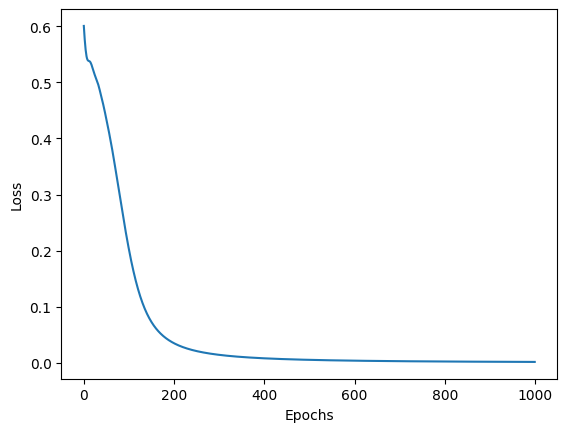

Training Losses are 
          0
0  0.675171
1  0.640254
2  0.610904
3  0.587075
4  0.568567
Validation Data
Confusion Matrix for hidden layer 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



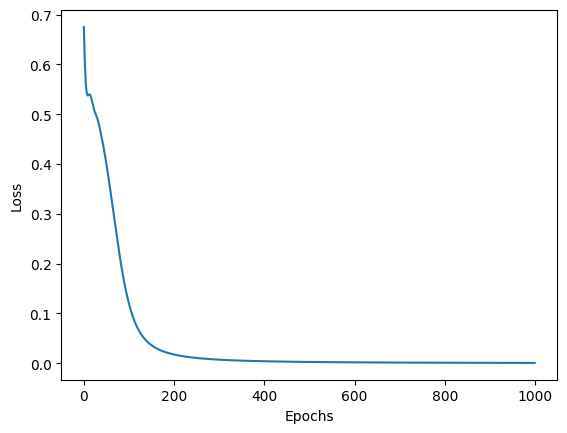

Training Losses are 
          0
0  0.644334
1  0.595851
2  0.563461
3  0.545334
4  0.538363
Validation Data
Confusion Matrix for hidden layer 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



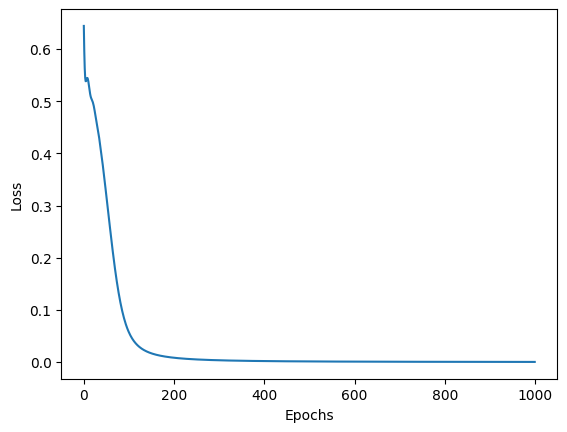

Training Losses are 
          0
0  0.761675
1  0.641895
2  0.572821
3  0.545256
4  0.544942
Validation Data
Confusion Matrix for hidden layer 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



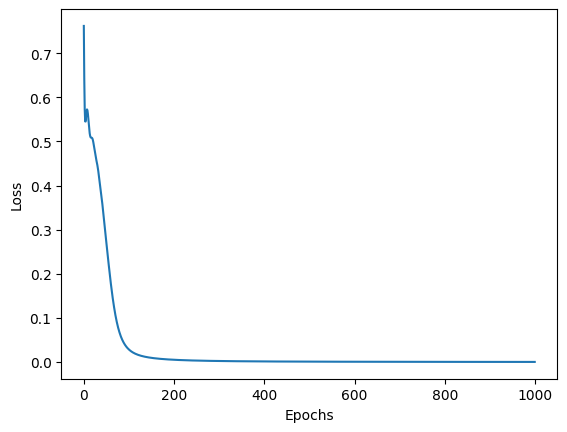

Training Losses are 
          0
0  0.597439
1  0.549914
2  0.568875
3  0.564168
4  0.544312
Validation Data
Confusion Matrix for hidden layer 128
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 128
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



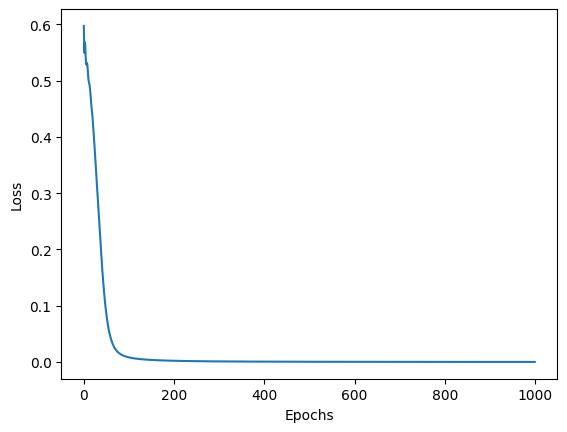

Best accuracy for test data is 1.0 for degree 8


In [13]:
nuerons = [8,16,32,64,128]
min_loss = 0
best_degree = 1000
for nueron in nuerons:
  model = SingleLayer(50,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.Adam(model.parameters(), lr=0.01)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss:
    min_loss = acc
    best_degree = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss} for degree {best_degree}")

In [14]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.778427
1  0.776258
2  0.774099
3  0.771951
4  0.769812
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3044    0]
 [ 506  450]]
Accuracy: 0.8735, Precision: 1.0000, Recall: 0.4707, F1-score: 0.6401

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3044    0]
 [ 507  449]]
Accuracy: 0.8732, Precision: 1.0000, Recall: 0.4697, F1-score: 0.6391



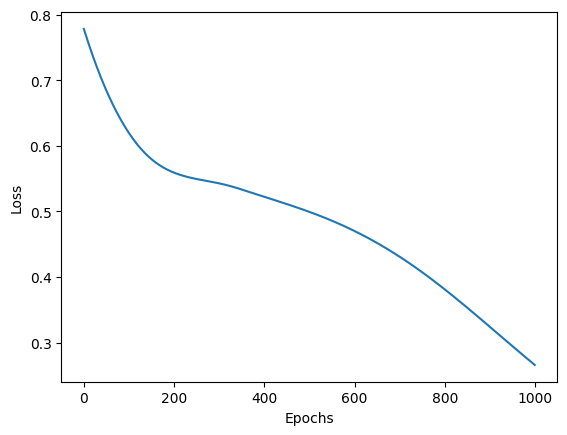

Training Losses are 
          0
0  0.789667
1  0.785415
2  0.781207
3  0.777046
4  0.772932
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



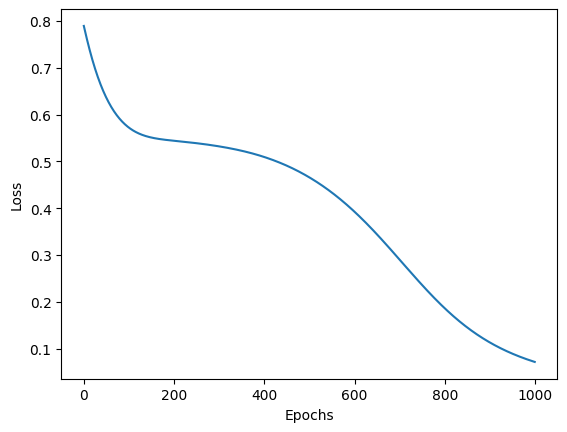

Training Losses are 
          0
0  0.605947
1  0.602595
2  0.599355
3  0.596228
4  0.593213
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



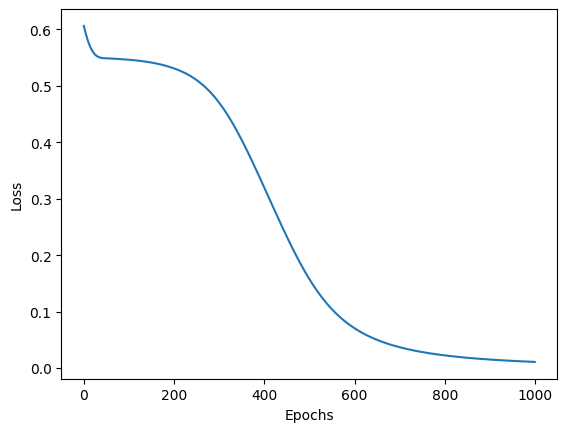

Training Losses are 
          0
0  0.619901
1  0.613121
2  0.606712
3  0.600675
4  0.595014
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



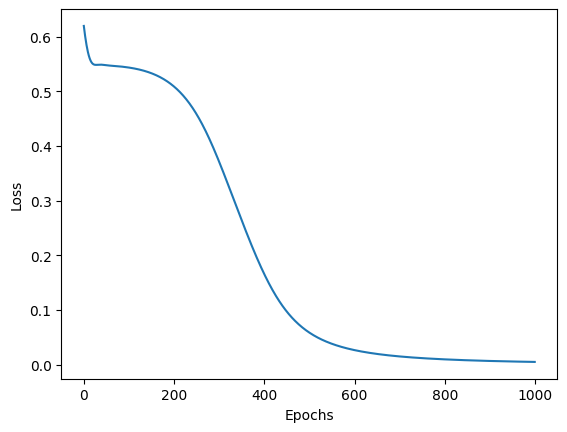

Training Losses are 
          0
0  0.784892
1  0.781700
2  0.778539
3  0.775409
4  0.772310
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



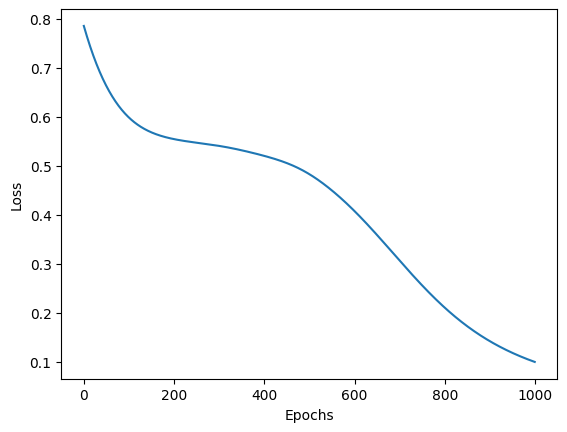

Training Losses are 
          0
0  0.637447
1  0.634606
2  0.631817
3  0.629078
4  0.626393
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



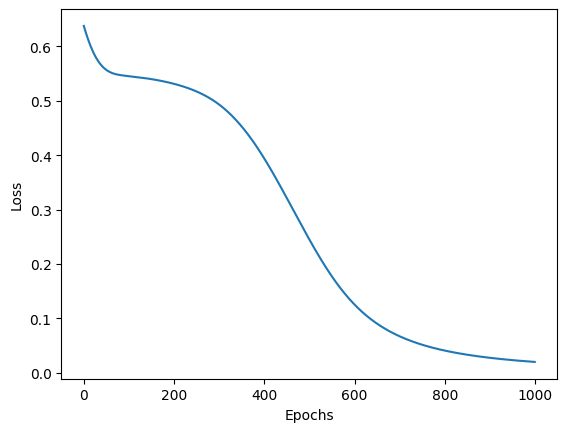

Training Losses are 
          0
0  0.626420
1  0.621646
2  0.617035
3  0.612588
4  0.608307
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



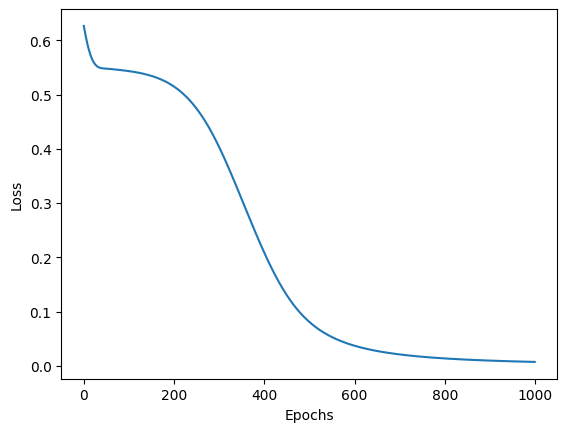

Training Losses are 
          0
0  0.787118
1  0.772824
2  0.758997
3  0.745646
4  0.732777
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



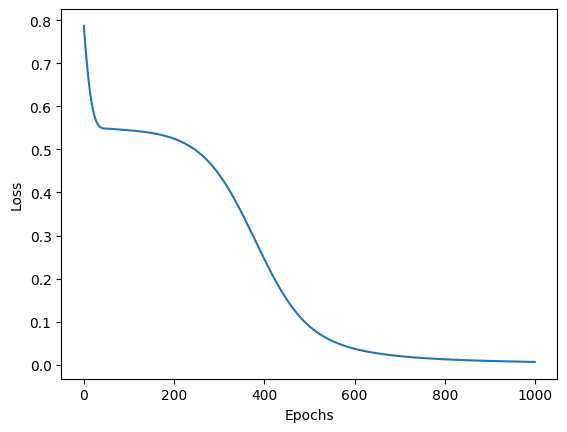

Training Losses are 
          0
0  0.831435
1  0.828358
2  0.825309
3  0.822287
4  0.819291
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



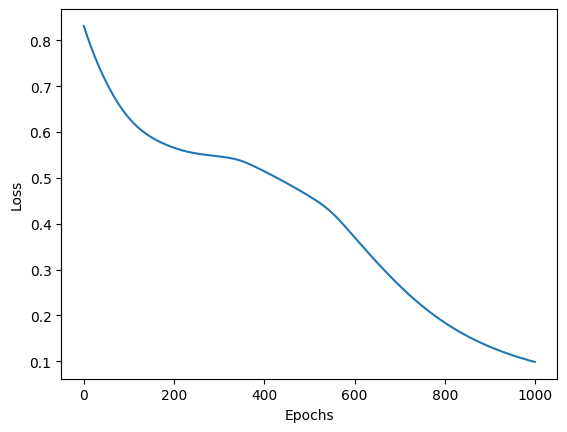

Training Losses are 
          0
0  0.890146
1  0.883154
2  0.876256
3  0.869451
4  0.862743
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 32 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



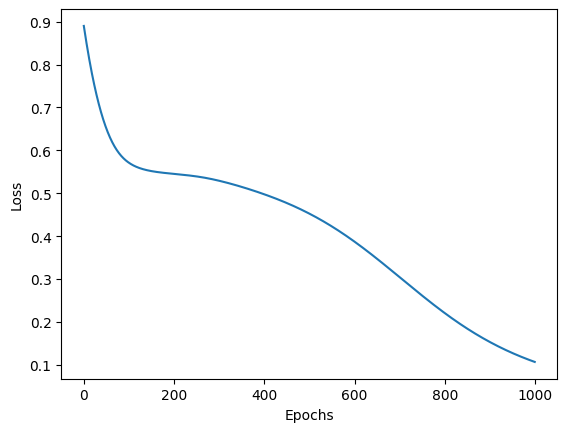

Training Losses are 
          0
0  0.618475
1  0.613269
2  0.608277
3  0.603501
4  0.598945
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 32 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



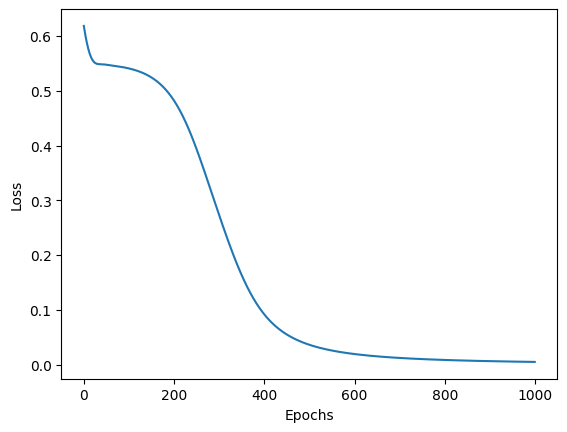

Training Losses are 
          0
0  0.765661
1  0.749372
2  0.733781
3  0.718898
4  0.704729
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 32 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



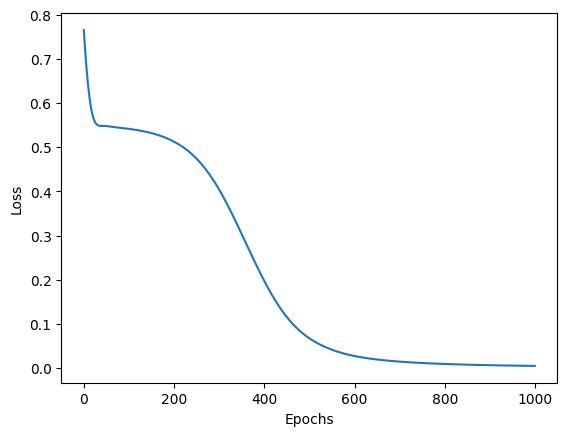

Training Losses are 
          0
0  0.623271
1  0.619594
2  0.616024
3  0.612563
4  0.609213
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 64 and 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



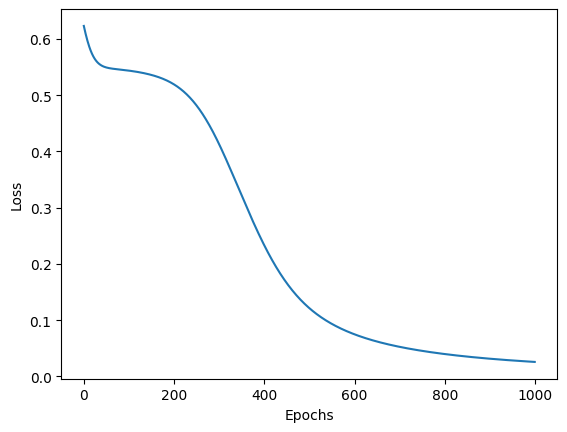

Training Losses are 
          0
0  0.615940
1  0.611659
2  0.607533
3  0.603563
4  0.599752
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 64 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



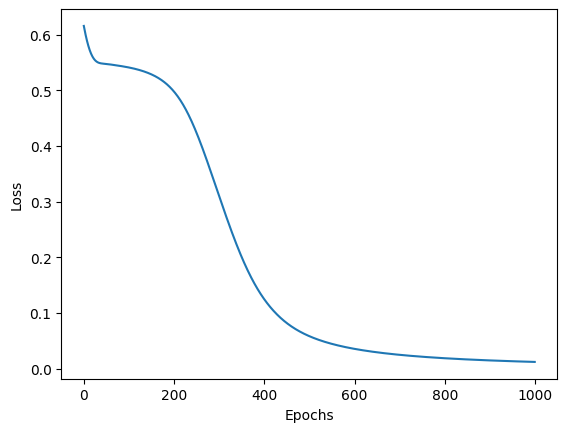

Training Losses are 
          0
0  0.746048
1  0.733183
2  0.720788
3  0.708870
4  0.697435
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 64 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



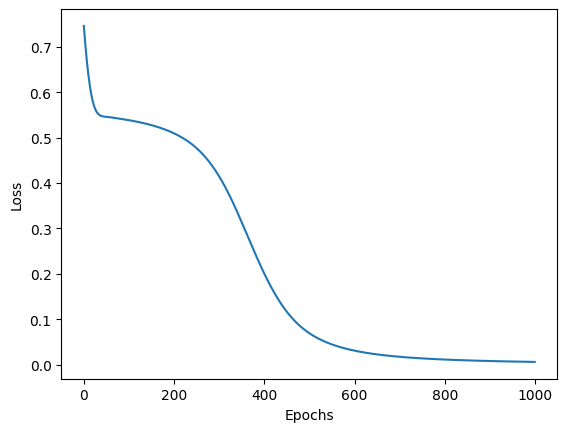

Training Losses are 
          0
0  0.652088
1  0.639110
2  0.627106
3  0.616075
4  0.606008
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 64 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



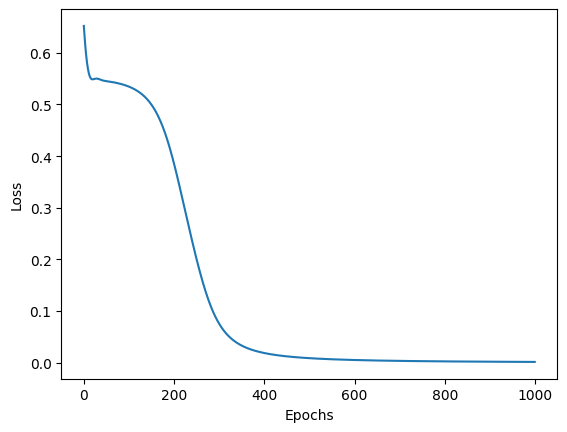

Best accuracy for test data is 1.0 for degree 8


In [15]:
nuerons = [8,16,32,64]
best_degree_3=0
best_accuracy_2=0

for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(50,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_2:
          best_accuracy_2=acc
          best_degree_4=nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_2} for degree {best_degree_4}")

In [18]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.742166
1  0.739909
2  0.737667
3  0.735442
4  0.733232
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3044    0]
 [   1  955]]
Accuracy: 0.9998, Precision: 1.0000, Recall: 0.9990, F1-score: 0.9995



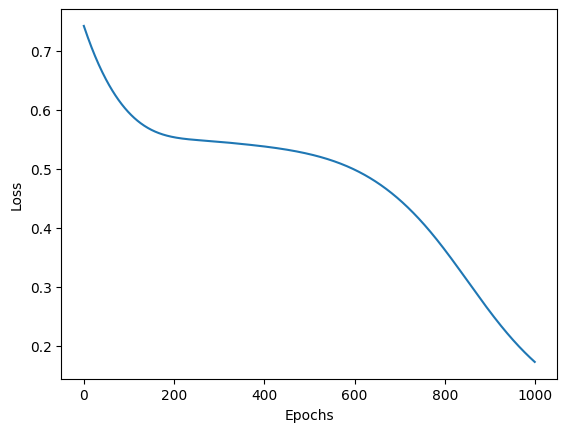

Training Losses are 
          0
0  0.671757
1  0.668893
2  0.666064
3  0.663271
4  0.660514
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



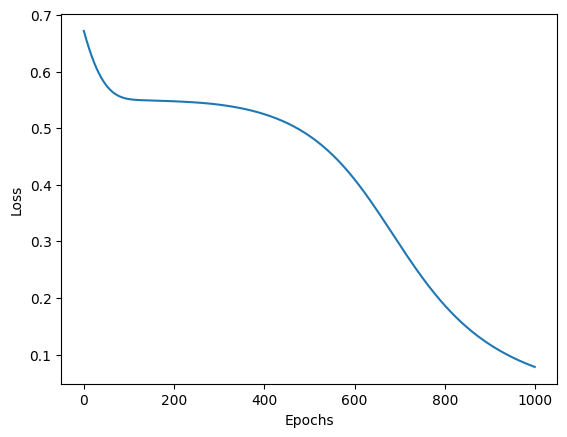

Training Losses are 
          0
0  0.746241
1  0.739726
2  0.733333
3  0.727065
4  0.720922
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



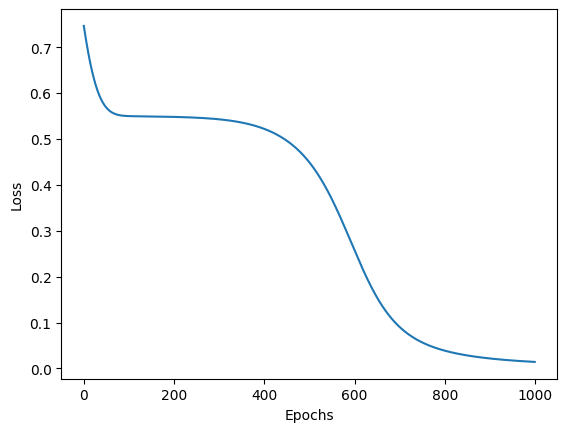

Training Losses are 
          0
0  0.660510
1  0.652114
2  0.644080
3  0.636412
4  0.629113
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



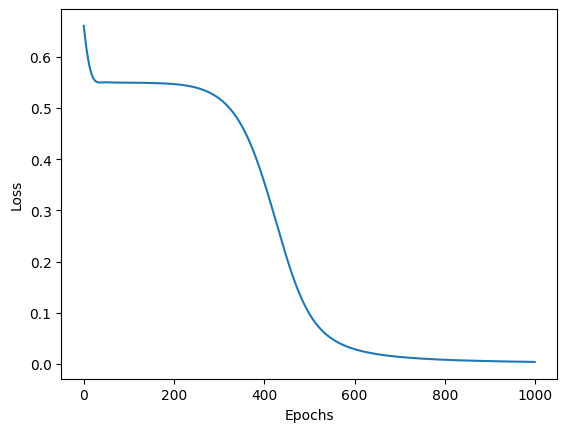

Training Losses are 
          0
0  0.832986
1  0.829786
2  0.826610
3  0.823457
4  0.820328
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[3044    0]
 [  86  870]]
Accuracy: 0.9785, Precision: 1.0000, Recall: 0.9100, F1-score: 0.9529

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[3044    0]
 [  86  870]]
Accuracy: 0.9785, Precision: 1.0000, Recall: 0.9100, F1-score: 0.9529



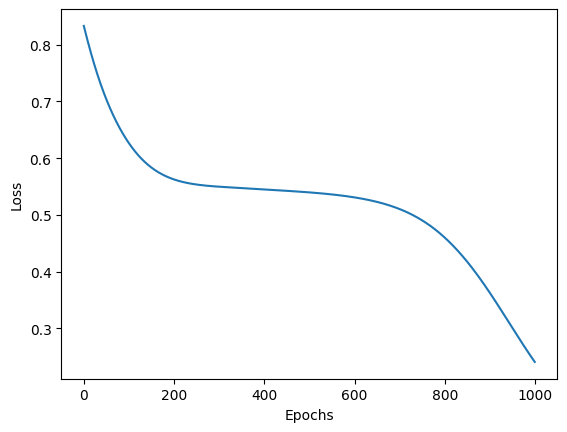

Training Losses are 
          0
0  0.603809
1  0.601559
2  0.599359
3  0.597211
4  0.595116
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



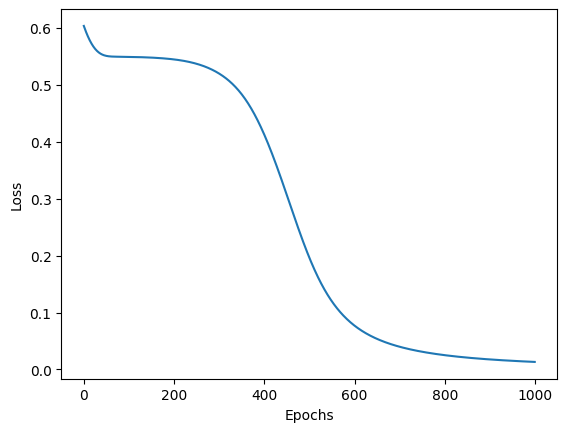

Training Losses are 
          0
0  0.676823
1  0.671106
2  0.665534
3  0.660109
4  0.654832
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



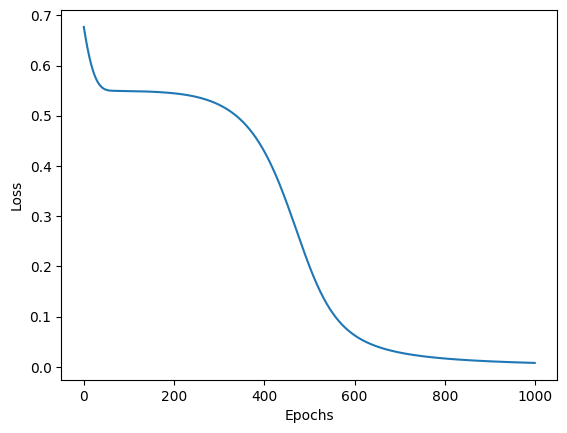

Training Losses are 
          0
0  0.680633
1  0.670470
2  0.660762
3  0.651510
4  0.642719
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



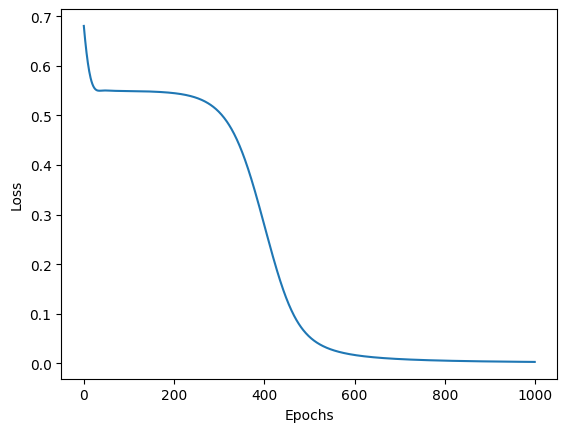

Training Losses are 
          0
0  0.788508
1  0.784650
2  0.780828
3  0.777045
4  0.773301
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



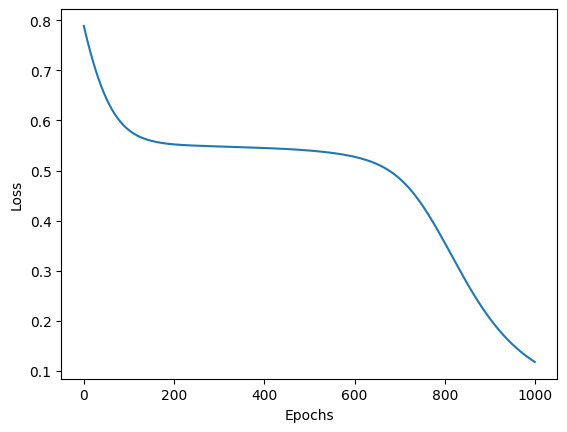

Training Losses are 
          0
0  0.653859
1  0.649783
2  0.645788
3  0.641877
4  0.638052
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



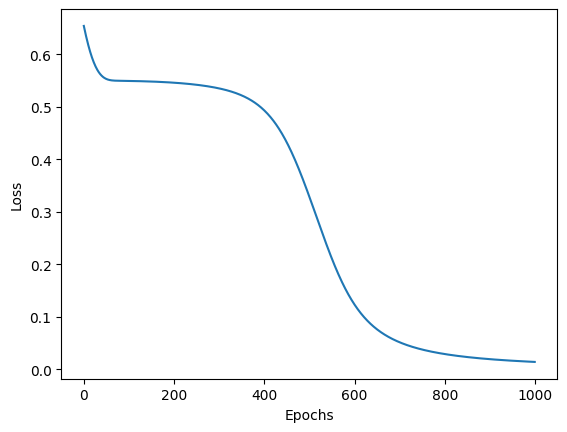

Training Losses are 
          0
0  0.717496
1  0.709055
2  0.700847
3  0.692876
4  0.685145
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



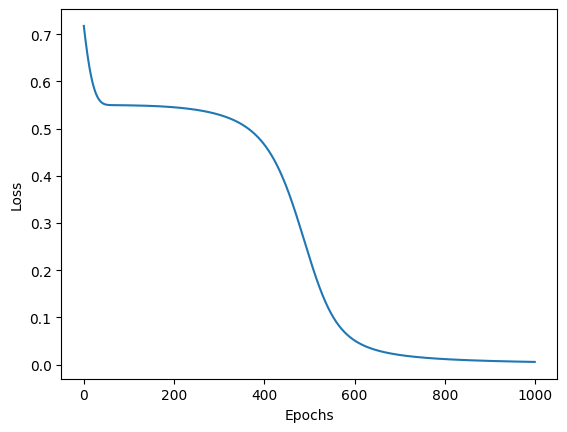

Training Losses are 
          0
0  0.595667
1  0.588669
2  0.582287
3  0.576527
4  0.571388
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



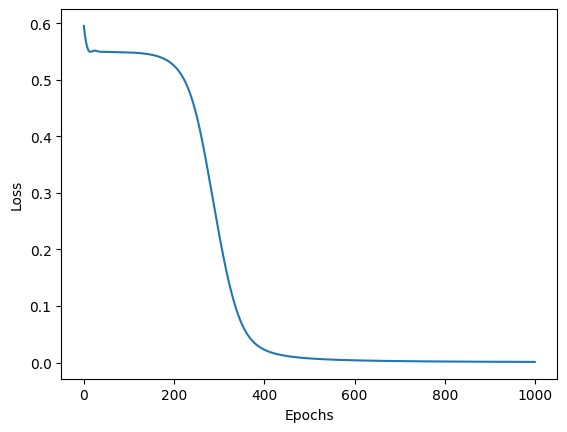

Training Losses are 
          0
0  0.733185
1  0.728177
2  0.723252
3  0.718411
4  0.713657
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



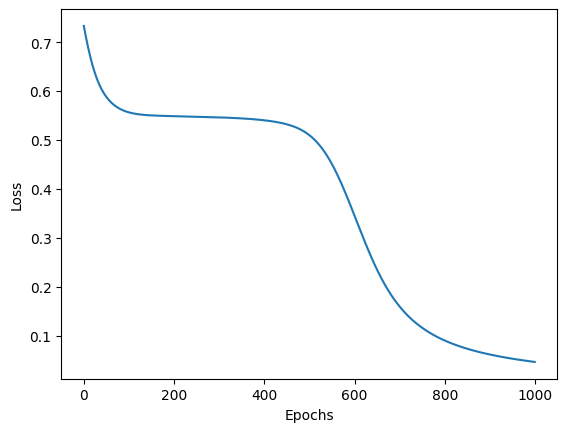

Training Losses are 
          0
0  0.715939
1  0.708669
2  0.701575
3  0.694661
4  0.687930
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



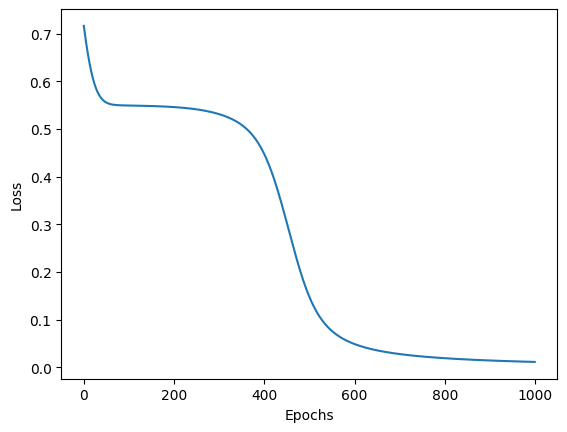

Training Losses are 
          0
0  0.741907
1  0.729728
2  0.717987
3  0.706694
4  0.695857
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



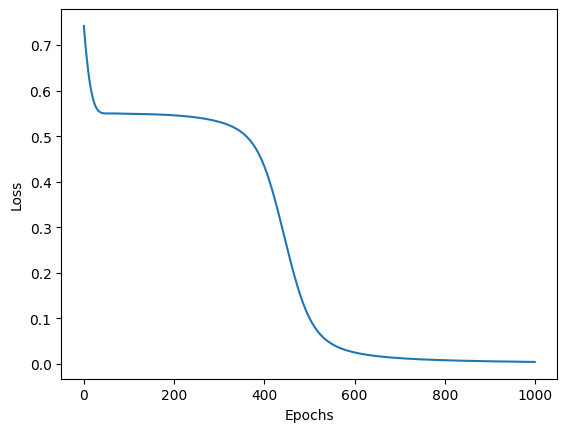

Training Losses are 
          0
0  0.819527
1  0.796769
2  0.775095
3  0.754526
4  0.735079
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



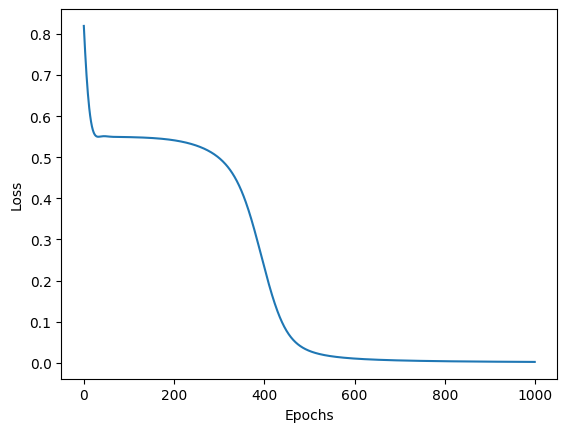

Training Losses are 
          0
0  0.686826
1  0.685099
2  0.683389
3  0.681693
4  0.680014
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



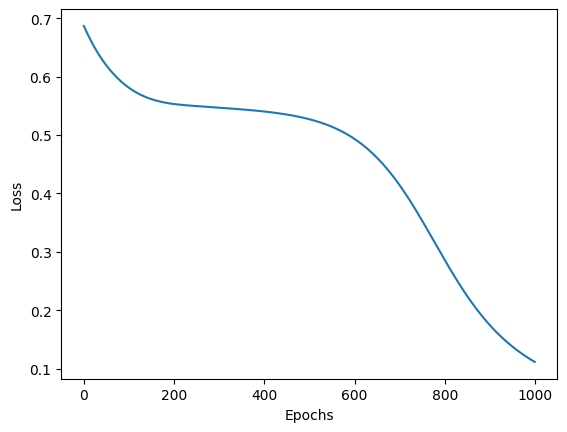

Training Losses are 
          0
0  0.794988
1  0.790765
2  0.786578
3  0.782428
4  0.778316
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



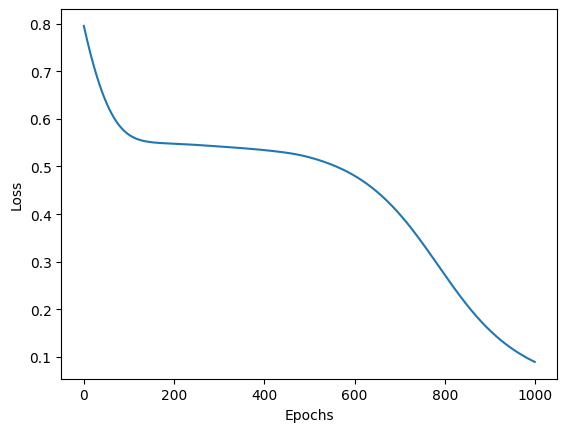

Training Losses are 
          0
0  0.789114
1  0.782050
2  0.775106
3  0.768283
4  0.761583
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



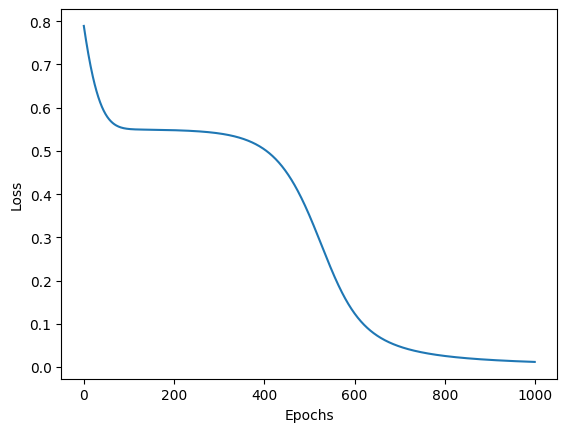

Training Losses are 
          0
0  0.679979
1  0.671000
2  0.662368
3  0.654089
4  0.646165
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



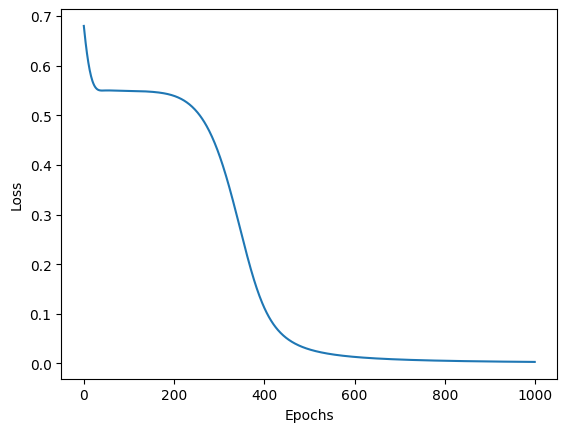

Training Losses are 
          0
0  0.741587
1  0.738944
2  0.736319
3  0.733713
4  0.731127
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



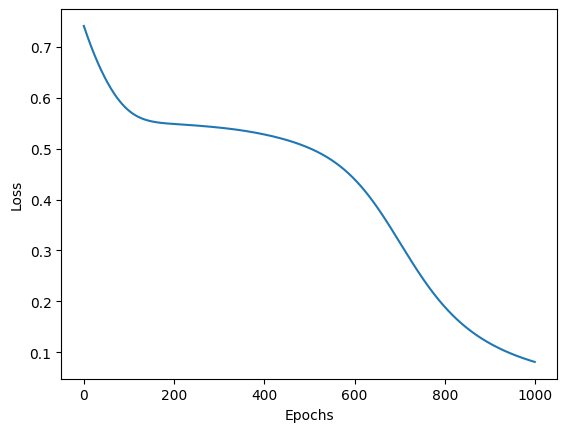

Training Losses are 
          0
0  0.605247
1  0.603050
2  0.600897
3  0.598787
4  0.596722
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



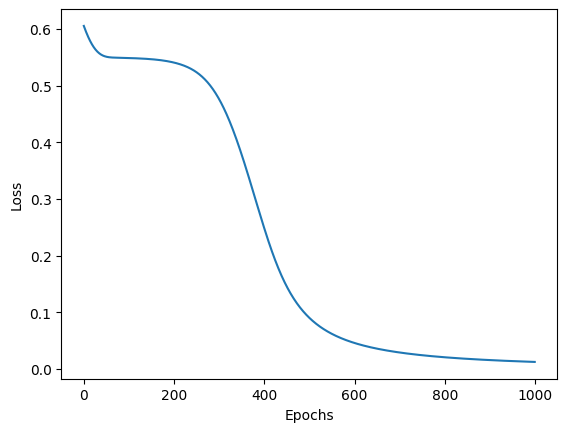

Training Losses are 
          0
0  0.610022
1  0.606065
2  0.602251
3  0.598582
4  0.595060
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



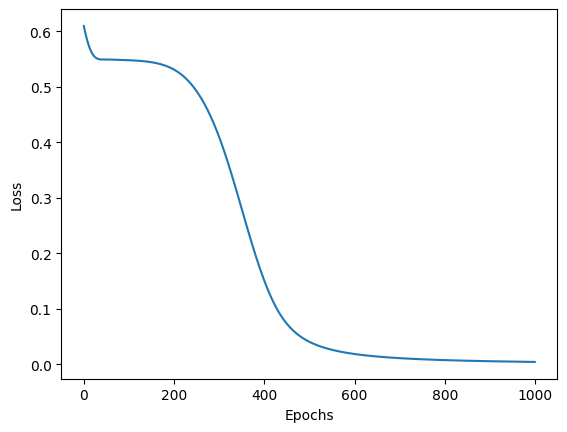

Training Losses are 
          0
0  0.595274
1  0.589910
2  0.584911
3  0.580280
4  0.576016
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



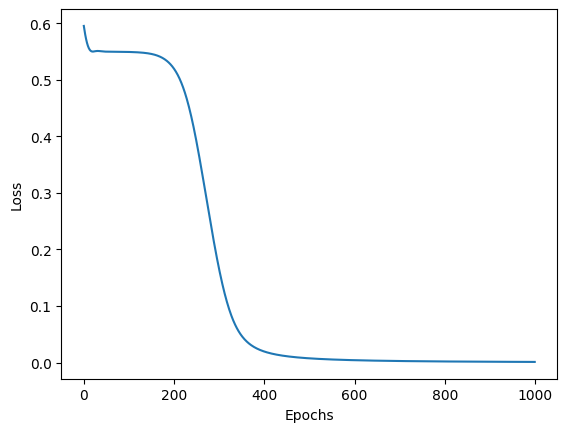

Training Losses are 
          0
0  0.775944
1  0.772825
2  0.769737
3  0.766682
4  0.763661
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



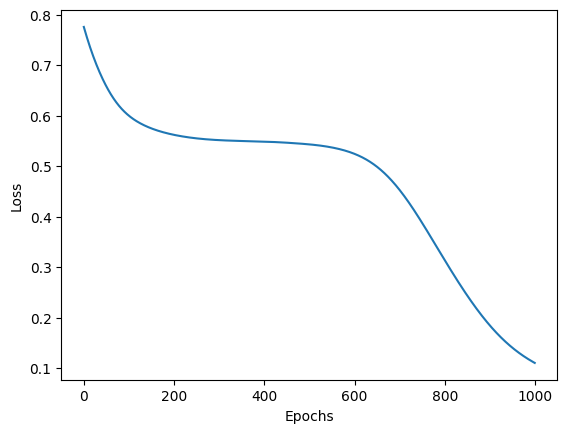

Training Losses are 
          0
0  0.631546
1  0.627735
2  0.624018
3  0.620397
4  0.616872
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



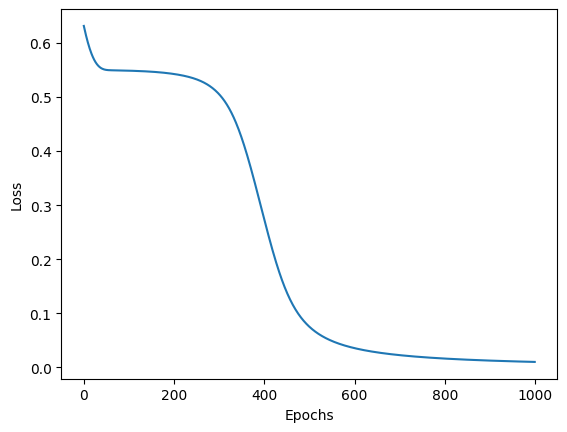

Training Losses are 
          0
0  0.626814
1  0.621704
2  0.616780
3  0.612042
4  0.607495
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[3044    0]
 [   0  956]]
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



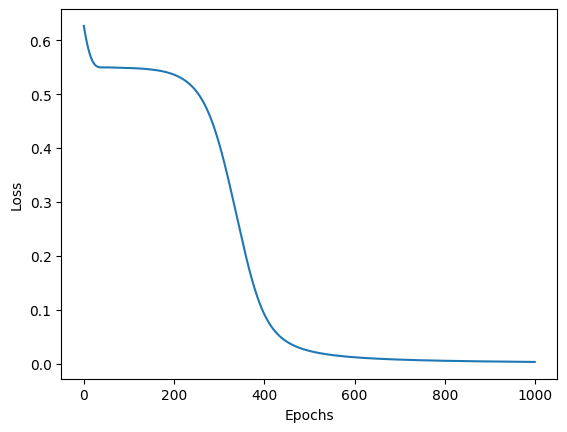

In [ ]:
nuerons = [8,16,32,64]
best_score=0
layer1=0
layer2=0
layer3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = TripleLayer(50,nueron,double_nueron,triple_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      if acc > best_score:
          best_score=acc
          layer1=nueron
          layer2=double_nueron
          layer3=triple_nueron
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()
print(f"The best accuracy on test data is {best_score} for layers {layer1} , {layer2}, {layer3}")

In [12]:
print(X_training.shape)

(12000, 50)
